# Model Development

### Objetivos

Luego de completar este curso seras capas de:
 - Desarrollar modelos de predicción

En esta sección, desarrollaremos varios modelos que predeciran el precio del vehículo las variables o caracteristicas. Esto es solo un estimado pero nos debería dar una idea objetiva de cuando debería costar un vehículo.

Algunas preguntas para hacernos en este modulo

 - Se si el vendedor esta ofreciendo un precio justo por mi intercambio?
 - Se si he puesto el precio justo para mi vehículo?

En data analytics, normalmente usamos **Desarrollo de Modelos** para ayudarnos a predecir futuras observaciones de la información que tenemos.

Un modelo nos ayudara a entender la relación exacta entre diferentes variables y como estas variables son usadas para predecir el resultado.

Preparación

importar librerías:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

df = pd.read_csv(filename, header=0)

df.head(5)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## 1. Regresión lineal y Regresión lineal multiple.

### Regresión lineal

Un ejemplo de modelo de datos que estaremos usando es:

**Regresión lineal simple**


La Regresión Lineal Simple es un método que nos ayuda a entender la relación entre dos variables:

 - La variable predictora/independiente (X)
 - La variable de respuesta/dependiente (que queremos predecir) (Y)
El resultado de la Regresión Lineal es una función lineal que predice la variable de respuesta (dependiente) como una función de la variable predictora (independiente).

$$
Y: Variable de Respuesta\\\\\\\\\\\\ 
X: Variables Predictoras
$$

**Función Lineal**
$$
Yhat = a + b  X
$$

 - a se refiere a la intersección de la línea de regresión, en otras palabras: el valor de Y cuando X es 0.

 - b se refiere a la pendiente de la línea de regresión, en otras palabras: el valor con el cual Y cambia cuando X aumenta en 1 unidad.

Vamos a importar los módulos para la Regresión Lineal:

In [4]:
from sklearn.linear_model import LinearRegression

#### Creamos el objeto Regresión lineal

In [5]:
lm = LinearRegression()
lm

LinearRegression()


¿Cómo podría "highway-mpg" ayudarnos a predecir el precio de un automóvil?
Para este ejemplo, queremos analizar cómo "highway-mpg" puede ayudarnos a predecir el precio del automóvil. Utilizando regresión lineal simple, crearemos una función lineal con "highway-mpg" como la variable predictora y el "precio" como la variable de respuesta.

In [6]:
X = df[["highway-mpg"]]
Y = df["price"]

Ajusta el modelo lineal utilizando "highway-mpg":

In [7]:
lm.fit(X,Y)

LinearRegression()

Podemos generar una predicción:

In [8]:
Yhat=lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

#### ¿Cuál es el valor de la intersección (a)?

In [9]:
lm.intercept_

38423.3058581574

#### ¿Cuál es el valor de la pendiente (b)?

In [10]:
lm.coef_

array([-821.73337832])


¿Cuál es el modelo lineal estimado final que obtenemos?
Como vimos anteriormente, deberíamos obtener un modelo lineal final con la estructura:

$$
Yhat = a + b  X
$$

Al insertar los valores reales, obtenemos:

**Price** = 38423.31 - 821.73 x highway-mpg

# Pregunta #1 a)

**Crea un objeto regresión lineal llamado "lm1"**

In [11]:
lm1 = LinearRegression()
lm1

LinearRegression()

# Pregunta #1 b):

**Entrena el modelo utilizando "engine-size" como la variable independiente y "price" como la variable dependiente.**

In [12]:
X = df[["engine-size"]]
Y = df[["price"]]

lm1.fit(X,Y)

LinearRegression()

# Pregunta #1 c):

**Encuentra la pendiente y la intersección del modelo.** 

#### Pendiente

In [13]:
# Slope
lm1.coef_

array([[166.86001569]])

#### Intersección

In [14]:
# Intercept
lm1.intercept_

array([-7963.33890628])

# Pregunta #1 d):

**¿Cuál es la ecuación de la línea predicha? Puedes usar x e yhat o "engine-size" o "price".**

In [15]:
# Usando X e Y

Yhat = -7963.34 + 166.86*X

Price = -7963.34 + 166.86*df["engine-size"]

¿Qué pasa si queremos predecir el precio de un automóvil usando más de una variable?

Si queremos usar más variables en nuestro modelo para predecir el precio de un automóvil, podemos usar la Regresión Lineal Múltiple. La Regresión Lineal Múltiple es muy similar a la Regresión Lineal Simple, pero este método se utiliza para explicar la relación entre una variable de respuesta continua (dependiente) y dos o más variables predictoras (independientes). La mayoría de los modelos de regresión del mundo real implican múltiples predictores. Ilustraremos la estructura utilizando cuatro variables predictoras, pero estos resultados pueden generalizarse a cualquier número entero.

$$
Y: Response \ Variable\\\\\\\\\\\\
X\_1 :Predictor\ Variable \ 1\\\\\\
X\_2: Predictor\ Variable \ 2\\\\\\
X\_3: Predictor\ Variable \ 3\\\\\\
X\_4: Predictor\ Variable \ 4\\\\\\
$$


$$
a: intercept\\\\\\\\\\\\
b\_1 :coeficientes \ de\ Variable \ 1\\\\\\
b\_2: coeficientes \ de\ Variable \ 2\\\\\\
b\_3: coeficientes \ de\ Variable \ 3\\\\\\
b\_4: coeficientes \ de\ Variable \ 4\\\\\\
$$


La ecuación es dada por:
$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$

De la sección anterior sabemos que otros buenos predictores del precio podrían ser:

- Caballos de fuerza
- Peso en vacío
- Tamaño del motor
- Millas por galón en carretera

Desarrollemos un modelo utilizando estas variables como las variables predictoras.

In [16]:
Z = df[["horsepower","curb-weight", "engine-size","highway-mpg"]]

Ajusta el modelo lineal utilizando las cuatro variables mencionadas anteriormente.


In [17]:
lm.fit(Z,df["price"])

LinearRegression()

¿Cual es el valor de la intersección (a)?

In [18]:
lm.intercept_

-15806.62462632923

¿Cuales son los valores de los coeficientes (b1,b2,b3,b4)?

In [19]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

¿Cuál es el modelo lineal estimado final que obtenemos?

Como vimos anteriormente, deberíamos obtener una función lineal final con la siguiente estructura:

$$
Yhat = a + b\_1 X\_1 + b\_2 X\_2 + b\_3 X\_3 + b\_4 X\_4
$$

Como vimos anteriormente, deberíamos obtener una función lineal final con la siguiente estructura:

¿Cuál es la función lineal que obtenemos en este ejemplo?

<b>Price</b> = -15806.62462632918 + 53.49574423 x <b>horsepower</b> + 4.70770099 x <b>curb-weight</b> + 81.53026382 x <b>engine-size</b> + 36.05748882 x <b>highway-mpg</b>

# Pregunta #2 a):

Crea y entrena multiples modelos de regresiones lineales "lm2" donde la variable de respuesta es "price",y la variable predictora es "normalized-losses" y "highway-mpg"

In [20]:
lm2 = LinearRegression()
lm2.fit(df[["normalized-losses", "highway-mpg"]], df["price"])

LinearRegression()

# Pregunta #2 b):
Encuentra el coeficiente del modelo.

In [21]:
lm2.coef_

array([   1.49789586, -820.45434016])

## 2. Evaluación del modelo usando visualización

Ahora que hemos desarrollado algunos modelos, ¿cómo evaluamos nuestros modelos y elegimos el mejor? Una forma de hacerlo es utilizando una visualización.

Importa el paquete de visualización, seaborn:

In [22]:
import seaborn as sns

### Gráfico de Regresión

Cuando se trata de regresión lineal simple, una excelente manera de visualizar el ajuste de nuestro modelo es utilizando gráficos de regresión.

Este gráfico mostrará una combinación de puntos de datos dispersos (un gráfico de dispersión), así como la línea de regresión lineal ajustada que pasa a través de los datos. Esto nos dará una estimación razonable de la relación entre las dos variables, la fuerza de la correlación, así como la dirección (correlación positiva o negativa).

Veamos la millas por galón en carretera (highway-mpg) como una variable predictora potencial del precio.

(0.0, 48162.76783756283)

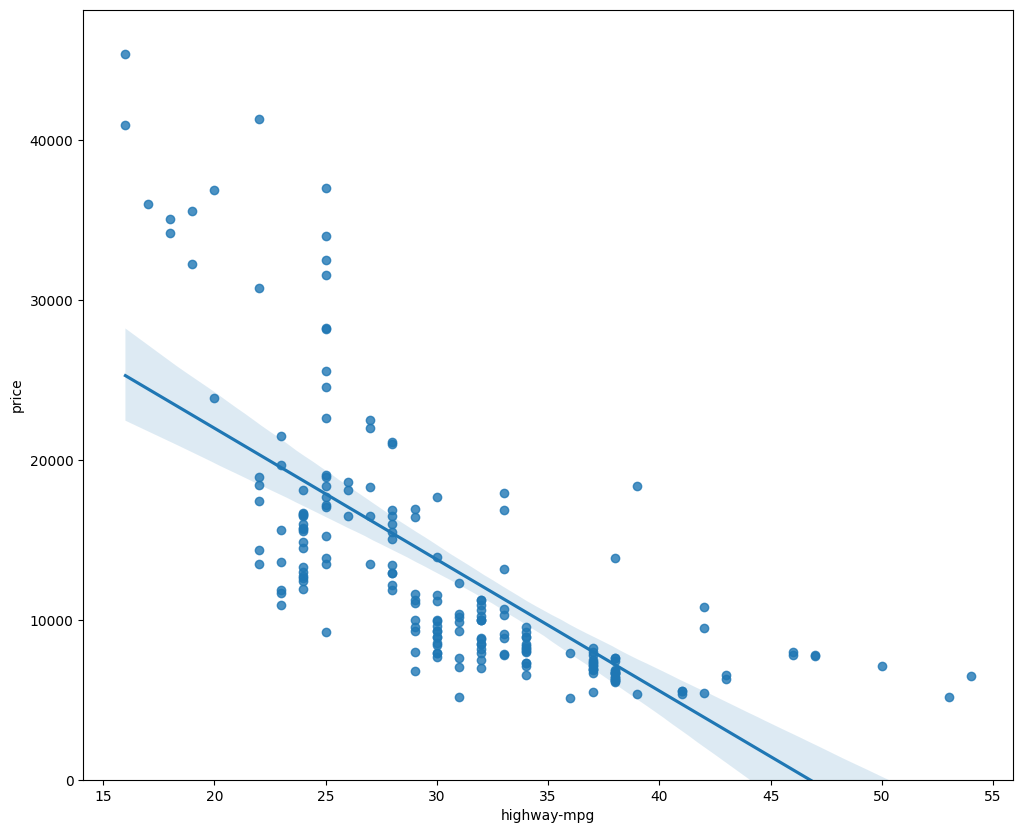

In [23]:
width = 12
height = 10
plt.figure(figsize=(width,height))
sns.regplot(x="highway-mpg",y="price",data=df)
plt.ylim(0,)

Podemos ver en este gráfico que el precio está correlacionado negativamente con las millas por galón en carretera (highway-mpg) ya que la pendiente de la regresión es negativa.

Una cosa a tener en cuenta al observar un gráfico de regresión es prestar atención a la dispersión de los puntos de datos alrededor de la línea de regresión. Esto te dará una buena indicación de la varianza de los datos y si un modelo lineal sería el mejor ajuste o no. Si los datos están demasiado alejados de la línea, es posible que este modelo lineal no sea el mejor modelo para estos datos.

Comparemos este gráfico con el gráfico de regresión de "peak-rpm".

(0.0, 47414.1)

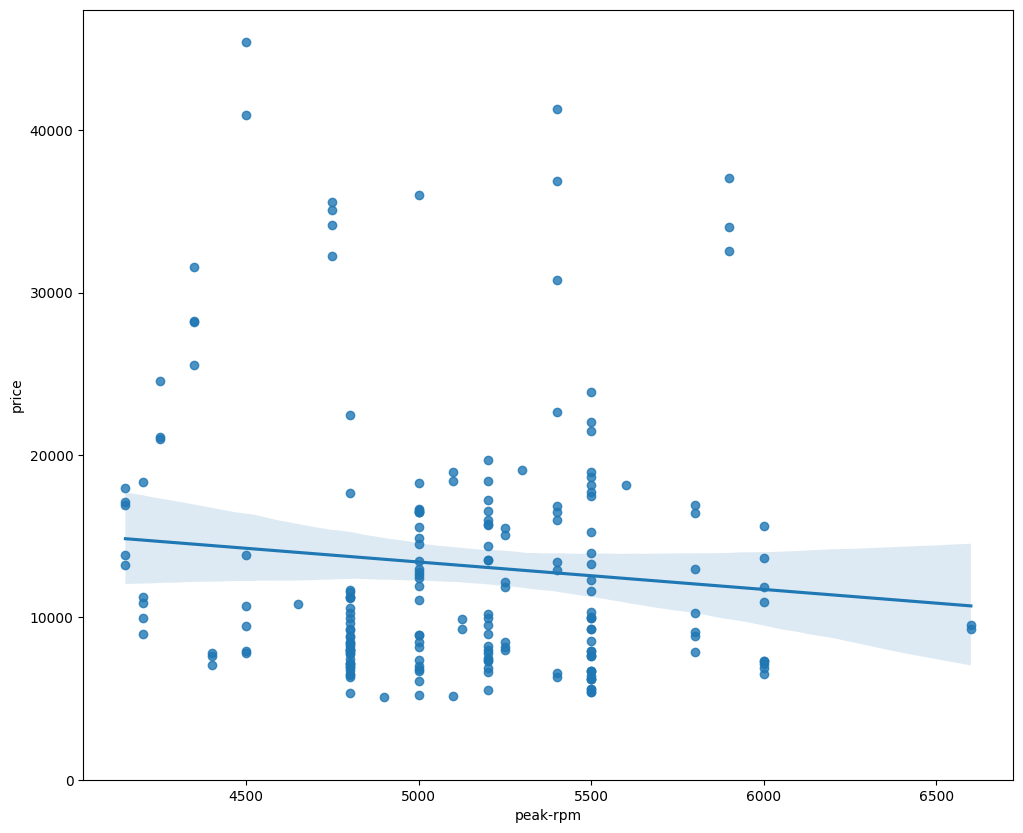

In [24]:
plt.figure(figsize=(width,height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

Al comparar el gráfico de regresión de "peak-rpm" y "highway-mpg", vemos que los puntos para "highway-mpg" están mucho más cerca de la línea generada y, en promedio, disminuyen. Los puntos para "peak-rpm" tienen una dispersión mayor alrededor de la línea predicha y es mucho más difícil determinar si los puntos están disminuyendo o aumentando a medida que aumenta el "peak-rpm".

# Pregunta #3:

Dado los gráficos de regresión anteriores, ¿"peak-rpm" o "highway-mpg" está más fuertemente correlacionado con "price"? Usa el método ".corr()" para verificar tu respuesta.

In [25]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


Gráfico de Residuos

Una buena manera de visualizar la varianza de los datos es utilizar un gráfico de residuos.

¿Qué es un residuo?

La diferencia entre el valor observado (y) y el valor predicho (Yhat) se llama residuo (e). Cuando observamos un gráfico de regresión, el residuo es la distancia desde el punto de datos hasta la línea de regresión ajustada.

Entonces, ¿qué es un gráfico de residuos?

Un gráfico de residuos es un gráfico que muestra los residuos en el eje vertical y y la variable independiente en el eje horizontal x.

¿A qué prestamos atención al mirar un gráfico de residuos?

Observamos la dispersión de los residuos:

- Si los puntos en un gráfico de residuos están dispersos aleatoriamente alrededor del eje x, entonces un modelo lineal es apropiado para los datos.

¿Por qué es eso? Los residuos dispersos aleatoriamente significan que la varianza es constante y, por lo tanto, el modelo lineal es un buen ajuste para estos datos.

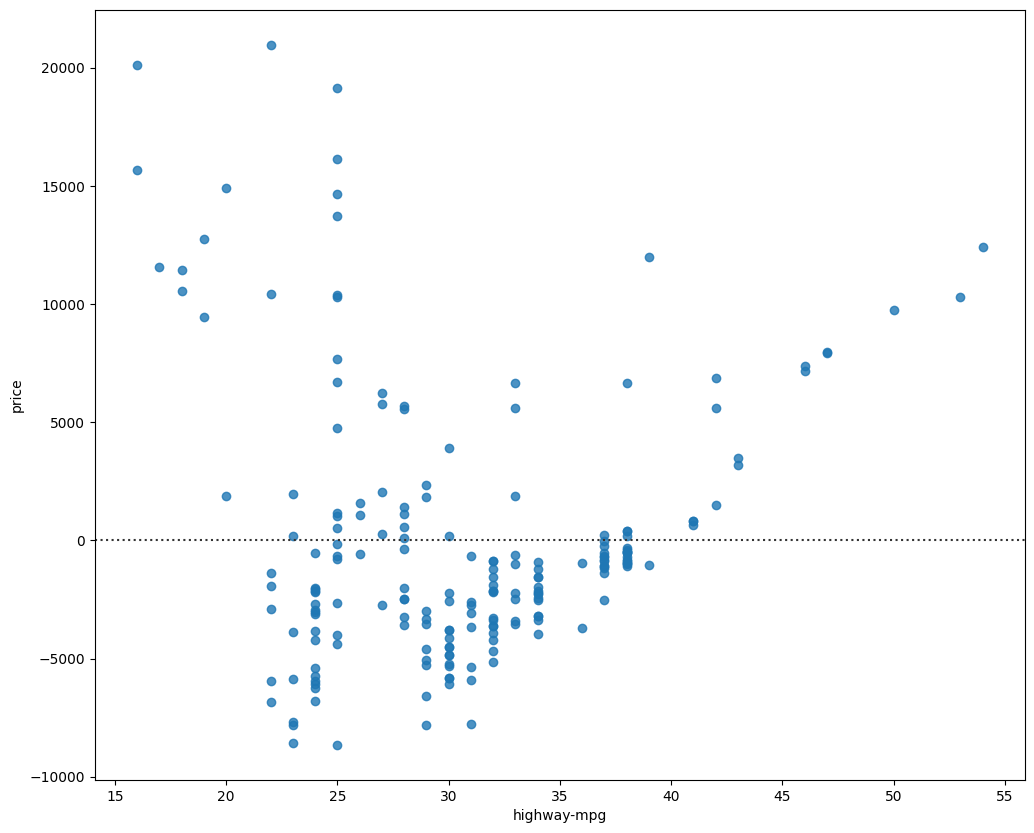

In [26]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df["highway-mpg"],y=df["price"])
plt.show()


¿Qué nos está diciendo este gráfico?

Podemos ver en este gráfico de residuos que los residuos no están dispersos aleatoriamente alrededor del eje x, lo que nos lleva a creer que tal vez un modelo no lineal sea más apropiado para estos datos.

### Regresión Lineal Múltiple
¿Cómo visualizamos un modelo para la Regresión Lineal Múltiple? Esto se vuelve un poco más complicado porque no podemos visualizarlo con un gráfico de regresión o de residuos.

Una forma de analizar el ajuste del modelo es observar el gráfico de distribución. Podemos observar la distribución de los valores ajustados que resultan del modelo y compararla con la distribución de los valores reales.

Primero, hagamos una predicción:

In [27]:
Y_hat = lm.predict(Z)

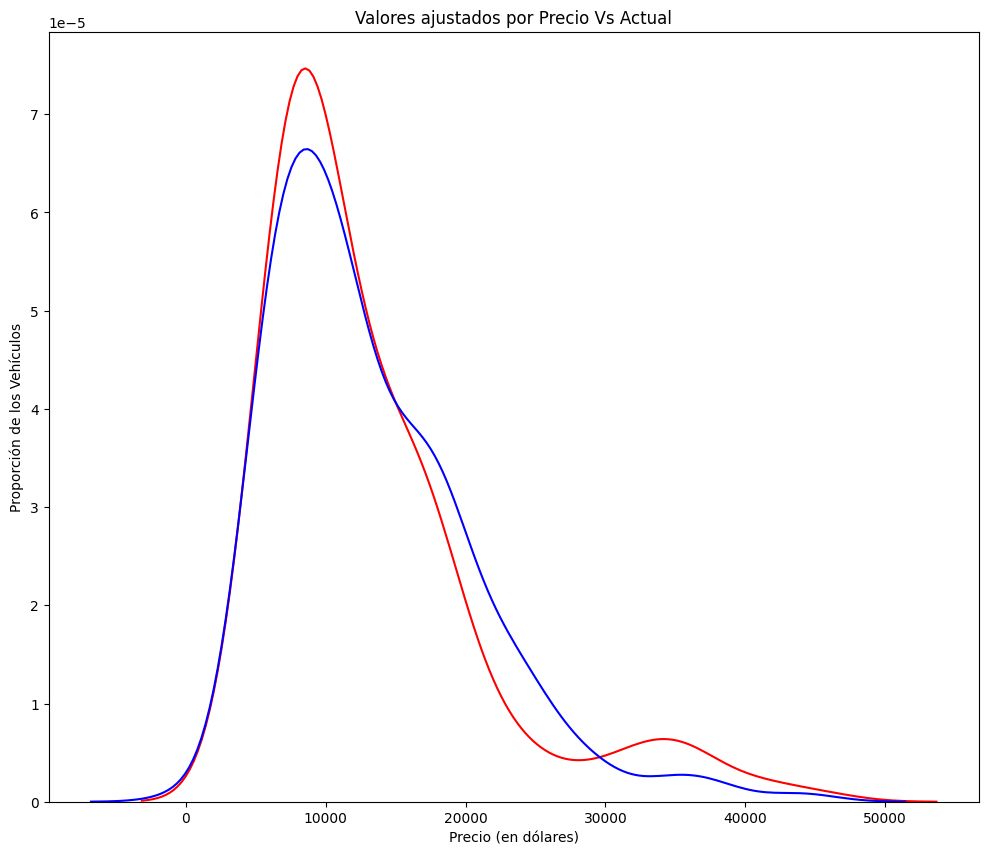

In [28]:
plt.figure(figsize=(width,height))

ax1 = sns.distplot(df["price"],hist=False,color="r", label="Valor actual")
sns.distplot(Y_hat,hist=False,color="b",label="Valores ajustados", ax=ax1)

plt.title("Valores ajustados por Precio Vs Actual")
plt.xlabel("Precio (en dólares)")
plt.ylabel("Proporción de los Vehículos")

plt.show()
plt.close()

Podemos ver que los valores ajustados están razonablemente cerca de los valores reales ya que las dos distribuciones se superponen un poco. Sin embargo, definitivamente hay margen para mejorar.

### 3. Regresión Polinómica y Pipelines

La regresión polinómica es un caso particular del modelo de regresión lineal general o de modelos de regresión lineal múltiple.

Obtenemos relaciones no lineales al elevar al cuadrado o establecer términos de orden superior de las variables predictoras.

Existen diferentes órdenes de regresión polinómica:

<center><b>Cuadrática - Orden 2</b></center>

<center> Yhat = a + b_1 X +b_2 X^2 </center>


<center><b>Cúbica - Orden 3</b></center>

<center>Yhat = a + b_1 X +b_2 X^2 +b_3 X^3</center>


<center><b>Orden Superior</b>:</center>

<center>Y = a + b_1 X +b_2 X^2 +b_3 X^3</center>



Vimos anteriormente que un modelo lineal no proporcionaba el mejor ajuste al usar "highway-mpg" como variable predictora. Veamos si podemos intentar ajustar un modelo polinómico a los datos en su lugar.

Utilizaremos la siguiente función para trazar los datos:

In [29]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15,55,100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.',x_new, y_new,'-')
    plt.title('Ajuste Polinómico con Matplotlib para Precio ~ Longitud')
    ax = plt.gca()
    ax.set_facecolor((0.898,0.898,0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Precio de los automóviles')

    plt.show()
    plt.close()

Vamos a obtener las variables:

In [30]:
x = df['highway-mpg']
y = df['price']

Vamos a ajustar el polinomio usando la función polyfit, luego usaremos la función poly1d para mostrar la función polinómica.

In [31]:
# Aquí usamos un polinomio de tercer orden (cúbico).
f = np.polyfit(x,y,3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


Vamos a trazar la función:

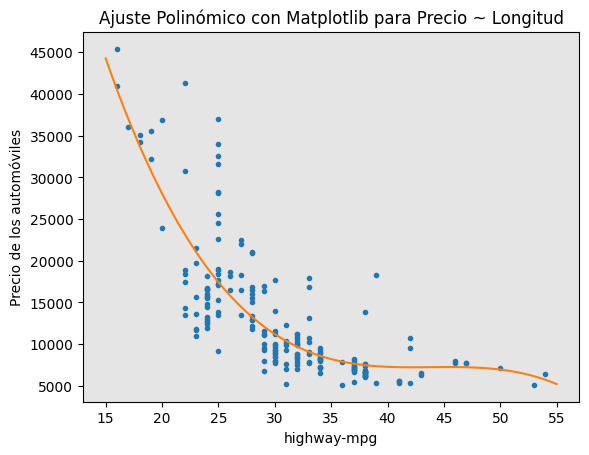

In [32]:
PlotPolly(p,x,y,'highway-mpg')

Ya podemos ver desde la gráfica que este modelo polinómico funciona mejor que el modelo lineal. Esto se debe a que la función polinómica generada "alcanza" más puntos de datos.

# Pregunta #4:

**Crear un modelo polinómico de orden 11 con las variables x e y de arriba.**

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


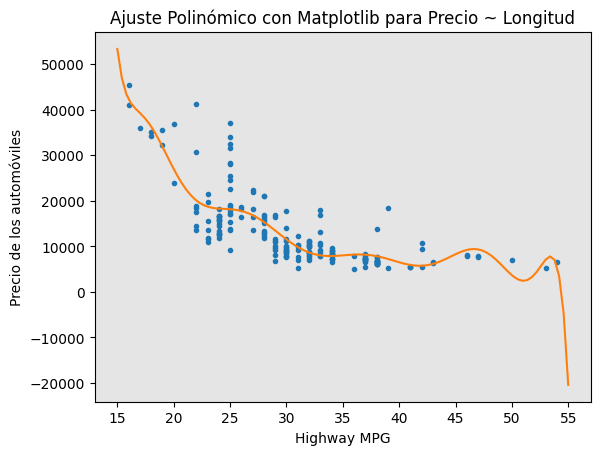

In [33]:
f1 = np.polyfit(x,y,11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y,'Highway MPG')

La expresión analítica para una función polinómica multivariable se complica. Por ejemplo, la expresión para un polinomio de segundo orden (grado=2) con dos variables se da por:

$$
Yhat = a + b\_1 X\_1 +b\_2 X\_2 +b\_3 X\_1 X\_2+b\_4 X\_1^2+b\_5 X\_2^2
$$

Podemos realizar una transformación polinómica en múltiples características. Primero, importamos el módulo:

In [34]:
from sklearn.preprocessing import PolynomialFeatures

Creamos un objeto **PolynomialFeatures** de grado 2:

In [35]:
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [36]:
Z_pr= pr.fit_transform(Z)

En los datos originales, hay 201 muestras y 4 características.

In [37]:
Z.shape

(201, 4)

## Pipeline

Los Data Pipelines simplifican los pasos de procesamiento de los datos. Usamos el módulo **Pipeline** para crear un pipeline. También usamos **StandardScaler** como un paso en nuestro pipeline.

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Creamos el pipeline creando una lista de tuplas que incluyen el nombre del modelo o estimador y su constructor correspondiente.

In [39]:
Input=[('scale', StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model', LinearRegression())]

Ingresamos la lista como un argumento al constructor del pipeline:

In [40]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Primero, convertimos el tipo de datos Z a tipo float para evitar advertencias de conversión que pueden aparecer como resultado de StandardScaler al tomar entradas float.

Luego, podemos normalizar los datos, realizar una transformación y ajustar el modelo simultáneamente.

In [41]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

De manera similar, podemos normalizar los datos, realizar una transformación y producir una predicción simultáneamente.

In [42]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

# Pregunta #5:

**Crear un pipeline que estandarice los datos, luego produzca una predicción utilizando un modelo de regresión lineal utilizando las características Z y el objetivo y.**

In [43]:
# Escribe acá tú respuesta.

Input=[('scale',StandardScaler()),('model', LinearRegression())]

pipe= Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

## 4. Medidas para la Evaluación en Muestra

Al evaluar nuestros modelos, no solo queremos visualizar los resultados, sino que también queremos una medida cuantitativa para determinar qué tan precisa es el modelo.

Dos medidas muy importantes que se utilizan a menudo en estadística para determinar la precisión de un modelo son:

- **R^2 / R-cuadrado**
- **Error cuadrático medio (MSE)**

**R-cuadrado**

R cuadrado, también conocido como coeficiente de determinación, es una medida que indica qué tan cerca están los datos de la línea de regresión ajustada.

El valor del R-cuadrado es el porcentaje de variación de la variable de respuesta (y) que es explicado por un modelo lineal.

**Error cuadrático medio (MSE)**

El error cuadrático medio mide el promedio de los cuadrados de los errores. Es decir, la diferencia entre el valor real (y) y el valor estimado (ŷ).

### Modelo 1: Regresión Lineal Simple

Vamos a calcular el R^2:

In [44]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.7609686443622008


Podemos decir que aproximadamente el ~76.096% de la variación del precio está explicada por este modelo lineal simple que hemos construido utilizando los datos de highway_mpg.

Calculemos el MSE:

Podemos predecir la salida, es decir, "yhat", usando el método predict, donde X es la variable de entrada:

In [45]:
Yhat=lm.predict(X)
print("La salida de los primeros cuatro valores predichos es: ", Yhat[0:4])

La salida de los primeros cuatro valores predichos es:  [[13728.4631336 ]
 [13728.4631336 ]
 [17399.38347881]
 [10224.40280408]]


Importemos la función mean_squared_error del módulo metrics:

In [46]:
from sklearn.metrics import mean_squared_error

Podemos comparar los resultados predichos con los resultados reales:

In [47]:
mse = mean_squared_error(df['price'], Yhat)
print("El error cuadrático medio del precio y el valor predicho es: ", mse)

El error cuadrático medio del precio y el valor predicho es:  15021126.02517414


### Modelo 2: Regresión lineal Multiple

Vamos a calcula R^2:

In [49]:
# Ajusta el modelo
lm.fit(Z,df["price"])

# Encuentra R^2
print("R-cuadrada es: ", lm.score(Z, df["price"]))

R-cuadrada es:  0.8093562806577457


Podemos decir que ~80.936% de la variación del precio es explicada por esta regresión lineal multiple "multi_fit"

Vamos a calcular el MSE.

Producimos una predicción:

In [50]:
Y_predict_multifit = lm.predict(Z)

Comparamos el resultado de la predicción con los resultados actuales:

In [52]:
print("El error cuadrático medio del precio y el valor predicho usando multifit es: ", mean_squared_error(df["price"],Y_predict_multifit))

El error cuadrático medio del precio y el valor predicho usando multifit es:  11980366.87072649


### Modelo 3: Ajuste Polinómico

Calculemos el R^2.

Importemos la función r2_score del módulo metrics ya que estamos usando una función diferente.

In [53]:
from sklearn.metrics import r2_score

Aplicamos la función para obtener el R^2:

In [54]:
r_squared = r2_score(y,p(x))

print("El valor de R-cuadrado es: ", r_squared)

El valor de R-cuadrado es:  0.674194666390652


podemos decir que ~67.419% de la variación de price es explicada por este ajuste polynomial.


### MSE

También podemos calcular el MSE:

In [55]:
mean_squared_error(df["price"],p(x))

20474146.426361218

## 5. Predicción y Toma de Decisiones

### Predicción
En la sección anterior, entrenamos el modelo usando el método **fit**. Ahora usaremos el método **predict** para producir una predicción. Importemos **pyplot** para trazar; también estaremos usando algunas funciones de numpy.

In [56]:
import matplotlib.pyplot as plt
import numpy as np

Crear una nueva entrada:

In [63]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

Ajusta el modelo:

In [66]:
lm.fit(X, Y)
lm

LinearRegression()

Genera un predicción

In [67]:
yhat=lm.predict(new_input)
yhat[0:5]

array([[-7796.47889059],
       [-7629.6188749 ],
       [-7462.75885921],
       [-7295.89884352],
       [-7129.03882782]])

Podemos trazar la información:

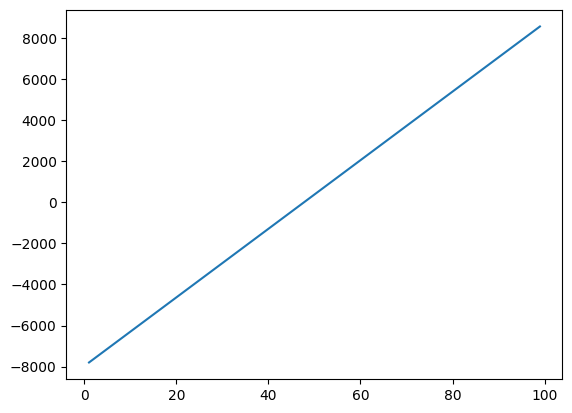

In [62]:
plt.plot(new_input,yhat)
plt.show()

### Toma de Decisiones: Determinando un Buen Ajuste del Modelo

Ahora que hemos visualizado los diferentes modelos y generado los valores de R-cuadrado y MSE para los ajustes, ¿cómo determinamos un buen ajuste del modelo?

- ¿Qué valor de R-cuadrado es bueno?
Al comparar modelos, **el modelo con un valor de R-cuadrado más alto es un mejor ajuste** para los datos.

- ¿Qué es un buen MSE?
Al comparar modelos, **el modelo con el valor de MSE más pequeño es un mejor ajuste** para los datos.

#### Veamos los valores de los diferentes modelos.

Regresión Lineal Simple: Usando Highway-mpg como Variable Predictora de Precio.

- **R-cuadrado**: 0.49659118843391759
- **MSE**: 3.16 x10^7

Regresión Lineal Múltiple: Usando Horsepower, Curb-weight, Engine-size y Highway-mpg como Variables Predictoras de Precio.

- **R-cuadrado**: 0.80896354913783497
- **MSE**: 1.2 x10^7

Ajuste Polinómico: Usando Highway-mpg como Variable Predictora de Precio.

- **R-cuadrado**: 0.6741946663906514
- **MSE**: 2.05 x 10^7

### Modelo de Regresión Lineal Simple (SLR) vs Modelo de Regresión Lineal Múltiple (MLR)

Por lo general, cuantas más variables tengas, mejor será tu modelo para predecir, pero esto no siempre es cierto. A veces puede que no tengas suficientes datos, te puedes encontrar con problemas numéricos, o muchas de las variables pueden no ser útiles e incluso actuar como ruido. Como resultado, siempre debes verificar el MSE y R^2.

Para comparar los resultados de los modelos MLR vs SLR, observamos una combinación tanto del R-cuadrado como del MSE para llegar a la mejor conclusión sobre el ajuste del modelo.

- **MSE**: El MSE de SLR es 3.16x10^7 mientras que MLR tiene un MSE de 1.2 x10^7. El MSE de MLR es mucho más pequeño.
- **R-cuadrado**: En este caso, también podemos ver que hay una gran diferencia entre el R-cuadrado de SLR y el R-cuadrado de MLR. El R-cuadrado para SLR (~0.497) es muy pequeño en comparación con el R-cuadrado para MLR (~0.809).

Este R-cuadrado en combinación con el MSE muestra que MLR parece ser el mejor ajuste de modelo en este caso en comparación con SLR.

### Modelo Lineal Simple (SLR) vs. Ajuste Polinómico

- **MSE**: Podemos ver que el Ajuste Polinómico redujo el MSE, ya que este MSE es más pequeño que el de SLR.
- **R-cuadrado**: El R-cuadrado para el Ajuste Polinómico es mayor que el R-cuadrado para SLR, por lo que el Ajuste Polinómico también aumentó bastante el R-cuadrado.
Dado que el Ajuste Polinómico resultó en un MSE más bajo y un R-cuadrado más alto, podemos concluir que este fue un modelo de ajuste mejor que la regresión lineal simple para predecir "precio" con "highway-mpg" como variable predictora.

### Regresión Lineal Múltiple (MLR) vs. Ajuste Polinómico
- **MSE**: El MSE para MLR es menor que el MSE para el Ajuste Polinómico.
- **R-cuadrado**: El R-cuadrado para MLR también es mucho más grande que para el Ajuste Polinómico.
## Conclusión
Comparando estos tres modelos, concluimos que el modelo MLR es el mejor modelo para poder predecir el precio a partir de nuestro conjunto de datos. Este resultado tiene sentido ya que tenemos 27 variables en total y sabemos que más de una de esas variables son potenciales predictores del precio final del automóvil.